In [6]:
using Images, QuartzImageIO

Let's load in an image and investigate what the resulting object looks like:

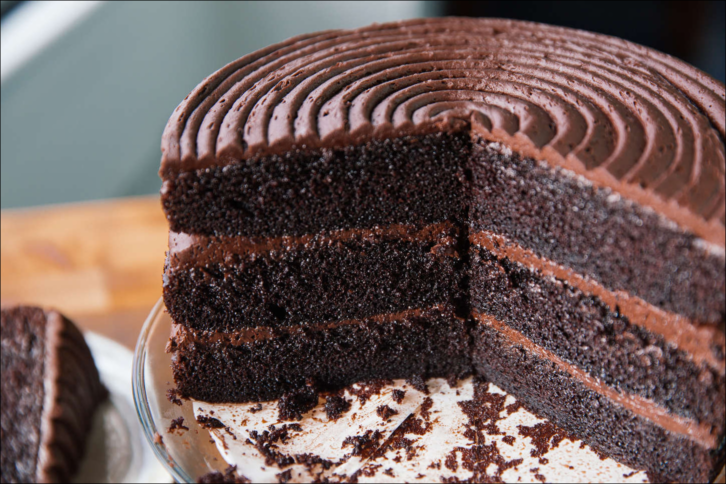

In [8]:
cake = load("Chocolate-Cake-20.jpg")

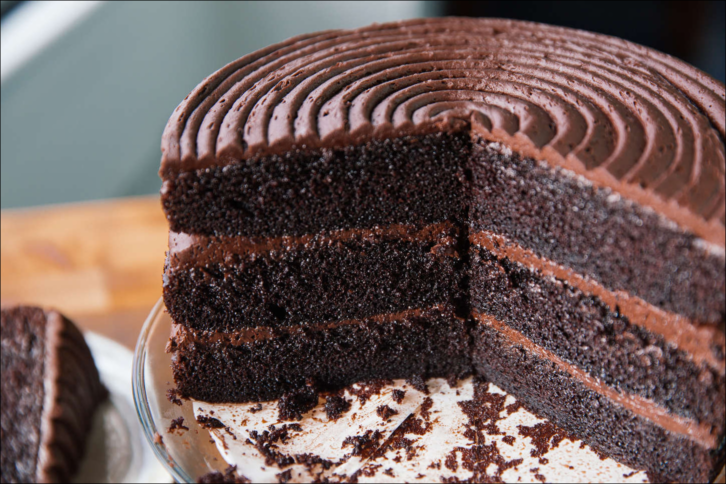

In [9]:
cake


In [10]:
typeof(cake)

Array{RGB4{Normed{UInt8,8}},2}

In [11]:
cake[1, 1]

In [12]:
cake[500, 500]

In [13]:
typeof(cake[500, 500])

RGB4{Normed{UInt8,8}}

In [14]:
?RGB4

search: RGB4 RGB24 RGBA RGB1 RGB ARGB ARGB32 AbstractRGB TransparentRGB



`RGB4` is a variant of `RGB` which has a padding element inserted at the end. In some applications it may have useful memory-alignment properties.

Like all other AbstractRGB objects, the constructor is still called `RGB4(r, g, b)`.


We see that the image is stored as a 2D array of RGB objects (3 numbers for each pixel: R, G and B between 0 and 1).

We can instead think of it as a 3D array using the `channelview` function:

In [15]:
size(cake)   # 966 rows x 1450 columns

(966, 1450)

In [16]:
channels = channelview(cake)

3×966×1450 reinterpret(N0f8, reshape(mappedarray(x->(MappedArrays.convert)($(Expr(:static_parameter, 1)), x), y->(MappedArrays.convert)($(Expr(:static_parameter, 1)), y), ::Array{RGB4{N0f8},2}), 1, 966, 1450)):
[:, :, 1] =
 0.337  0.333  0.322  0.31   0.294  …  0.247  0.239  0.235  0.227  0.224
 0.392  0.388  0.376  0.365  0.349     0.204  0.196  0.192  0.184  0.18 
 0.404  0.4    0.388  0.376  0.361     0.227  0.22   0.216  0.208  0.204

[:, :, 2] =
 0.333  0.329  0.318  0.306  0.294  …  0.247  0.243  0.235  0.231  0.224
 0.388  0.384  0.373  0.361  0.349     0.204  0.2    0.192  0.188  0.18 
 0.4    0.396  0.384  0.373  0.361     0.22   0.216  0.208  0.204  0.196

[:, :, 3] =
 0.329  0.325  0.314  0.302  0.286  …  0.251  0.247  0.243  0.235  0.231
 0.384  0.38   0.369  0.357  0.341     0.204  0.2    0.196  0.188  0.184
 0.396  0.392  0.38   0.369  0.353     0.22   0.216  0.212  0.204  0.2  

...

[:, :, 1448] =
 0.051  0.051  0.051  0.051  0.051  …  0.427  0.427  0.424  0.42   0.42 


This is a *view* of the data, without copying:

In [17]:
channels[3, 100, 100]

0.604N0f8

In [18]:
show(cake[100, 100])

RGB4{N0f8}(0.518,0.588,0.604)

In [19]:
channels[3, 100, 100] = 0.7N0f8

0.698N0f8

In [20]:
show(cake[100, 100])  # has now changed

RGB4{N0f8}(0.518,0.588,0.698)

We can convert these numbers to standard floats; note that this copies all the data:

In [21]:
channels2 = Float64.(channelview(cake))

3×966×1450 Array{Float64,3}:
[:, :, 1] =
 0.337255  0.333333  0.321569  0.309804  …  0.235294  0.227451  0.223529
 0.392157  0.388235  0.376471  0.364706     0.192157  0.184314  0.180392
 0.403922  0.4       0.388235  0.376471     0.215686  0.207843  0.203922

[:, :, 2] =
 0.333333  0.329412  0.317647  0.305882  …  0.235294  0.231373  0.223529
 0.388235  0.384314  0.372549  0.360784     0.192157  0.188235  0.180392
 0.4       0.396078  0.384314  0.372549     0.207843  0.203922  0.196078

[:, :, 3] =
 0.329412  0.32549   0.313725  0.301961  …  0.243137  0.235294  0.231373
 0.384314  0.380392  0.368627  0.356863     0.196078  0.188235  0.184314
 0.396078  0.392157  0.380392  0.368627     0.211765  0.203922  0.2     

...

[:, :, 1448] =
 0.0509804  0.0509804  0.0509804  0.0509804  …  0.423529  0.419608  0.419608
 0.0627451  0.0627451  0.0627451  0.0627451     0.258824  0.254902  0.254902
 0.0901961  0.0901961  0.0901961  0.0901961     0.164706  0.160784  0.160784

[:, :, 1449] =
 0.04705

We can reconstruct the image using `colorview`:

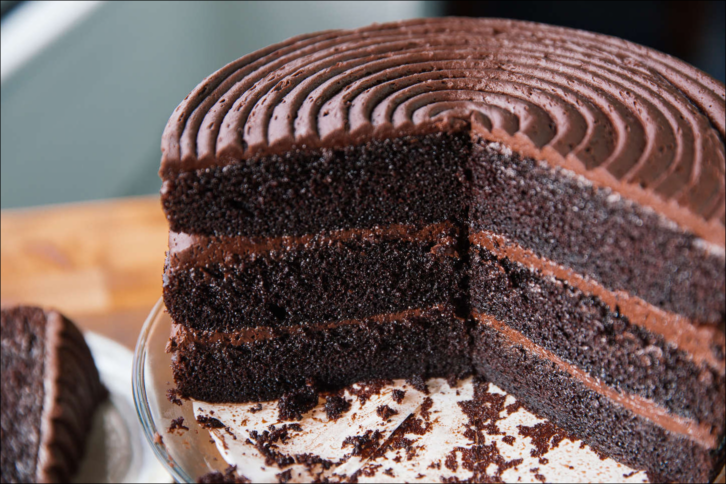

In [22]:
colorview(RGB, channels2[1, :, :], channels2[2, :, :], channels2[3, :, :])

For example, we could use just the red channel:

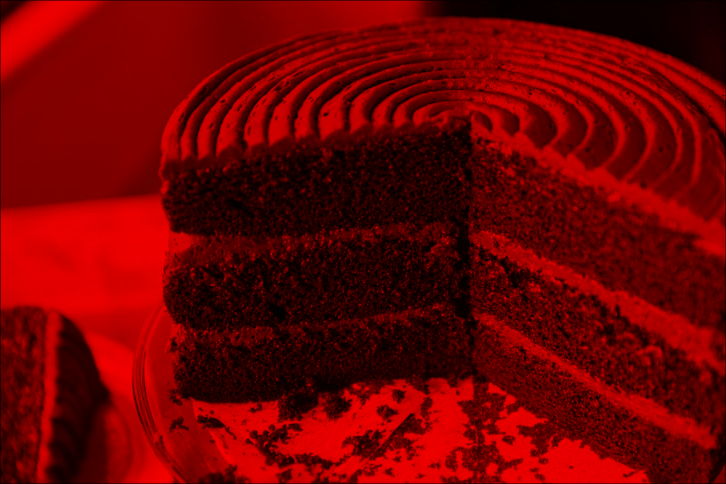

In [25]:
colorview(RGB, channels2[1, :, :], zeros(size(channels2[2, :, :])), zeros(size(channels2[3, :, :])))

And convert it to a gray scale:

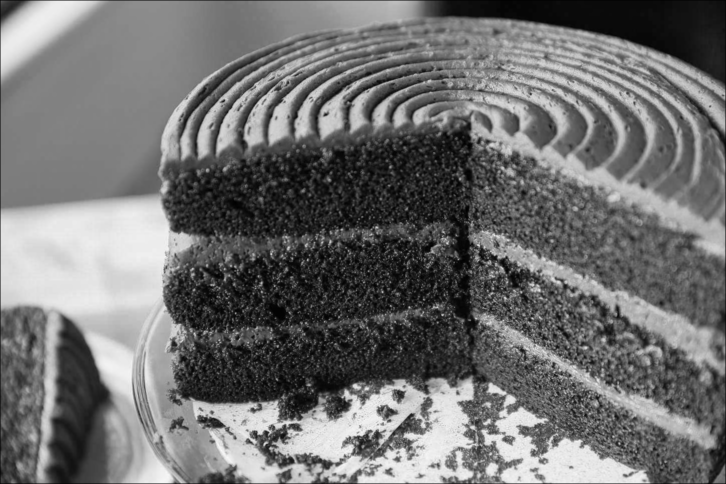

In [26]:
Gray.(channels2[1, :, :])

In [ ]:
Gray(channels2[1, 100, 100])